In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

import graphviz # Library by Terence Parr https://explained.ai/decision-tree-viz/ To install: ! pip install graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Data set

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
X = pd.DataFrame(iris.data)
X.columns = iris.feature_names
X = X[X.columns[2:]]
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
y = pd.DataFrame(iris.target)
y.columns = ['target']
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
y.value_counts()

target
0         50
1         50
2         50
dtype: int64

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# EDA

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

In [10]:
dt = DecisionTreeClassifier(criterion='entropy')

In [11]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
y_pred_dt = dt.predict(X_test)

In [13]:
y_pred_dt

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [14]:
y_test.target.values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [15]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


In [16]:
y_train.value_counts()

target
1         41
0         40
2         39
dtype: int64

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

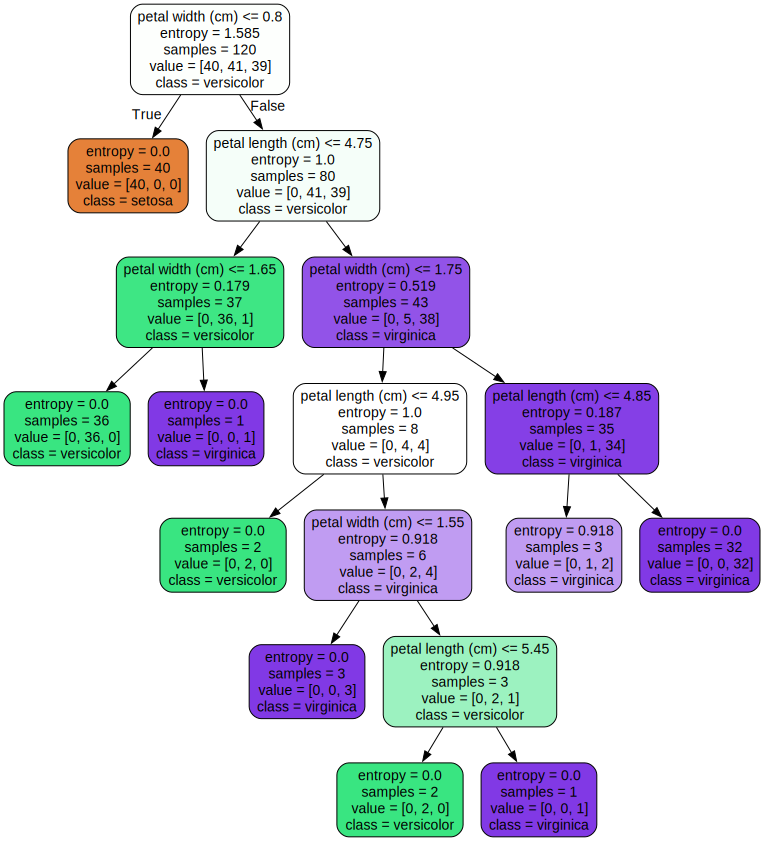

In [18]:
viz = export_graphviz(dt,
                      feature_names=X_train.columns,
                      class_names=iris.target_names,
                      rounded=True, filled=True
                     )

graph = graphviz.Source(viz)
graph